# Predicting PV Installation

In [29]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection as ms
#from sklearn import cross_validation as cv
from sklearn.model_selection import train_test_split 
from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
installation = pd.read_csv('/Users/graceluningfu/Desktop/residential_instances_feature_set8_b.csv', sep=",")

In [3]:
installation.head()

,sfh_qty,th_qty,households,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,net_summer_capacity_mw,year_since_1990,rounded_price_per_watt,interconn,net_metering,count
0,31285,1032,36435,3571,984,802,10.31,42344,24.00,4.59,2,1,1
1,31285,1032,36435,3571,984,802,10.31,42344,22.25,6.02,2,1,1
2,31285,1032,36435,3571,984,802,10.31,42344,21.25,6.48,2,1,1
3,31285,1032,36435,3571,984,802,10.31,42344,20.00,7.52,2,1,1
4,204398,18020,299764,39869,14389,11691,15.28,40249,26.00,4.21,2,1,83


In [4]:
installation.columns = ['Hu_detached','Hu_attached','households','hhincome_100_below_150k','hhincome_150_below_200k','hhincome_above_200k',\
                 'avg_rtl_price','net_summer_capacity_mw', 'year_since_1990',\
                        'rounded_price_per_watt','interconn','net_meterin','count']

installation.head()

,Hu_detached,Hu_attached,households,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,net_summer_capacity_mw,year_since_1990,rounded_price_per_watt,interconn,net_meterin,count
0,31285,1032,36435,3571,984,802,10.31,42344,24.00,4.59,2,1,1
1,31285,1032,36435,3571,984,802,10.31,42344,22.25,6.02,2,1,1
2,31285,1032,36435,3571,984,802,10.31,42344,21.25,6.48,2,1,1
3,31285,1032,36435,3571,984,802,10.31,42344,20.00,7.52,2,1,1
4,204398,18020,299764,39869,14389,11691,15.28,40249,26.00,4.21,2,1,83


In [5]:
installation.describe()

,Hu_detached,Hu_attached,households,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,net_summer_capacity_mw,year_since_1990,rounded_price_per_watt,interconn,net_meterin,count
count,1.218300e+04,12183.000000,1.218300e+04,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000
mean,9.477498e+04,11855.355988,1.514793e+05,22075.024871,9768.778462,10777.460560,12.814342,36288.711155,21.251457,6.270647,2.202824,1.531232,57.193138
std,1.692525e+05,29376.307979,2.979526e+05,42472.819528,19695.904649,24262.084539,2.877587,28337.306630,3.304270,1.546999,1.279064,1.166695,271.266667
min,6.520000e+02,1.000000,6.710000e+02,16.000000,0.000000,0.000000,8.190000,21.000000,9.250000,4.180000,1.000000,1.000000,1.000000
25%,1.983900e+04,571.000000,2.213300e+04,2514.000000,679.000000,515.000000,10.310000,15916.000000,19.250000,4.600000,1.000000,1.000000,1.000000
50%,4.186000e+04,2647.000000,5.524000e+04,7536.000000,2585.000000,1942.000000,13.740000,28711.000000,21.750000,6.320000,2.000000,1.000000,4.000000
75%,1.082075e+05,10398.000000,1.663450e+05,25601.000000,11488.000000,9482.000000,15.420000,42344.000000,24.000000,7.950000,2.000000,1.000000,18.000000
max,1.721774e+06,392510.000000,3.263069e+06,443777.000000,195784.000000,228415.000000,17.770000,117144.000000,26.000000,12.550000,5.000000,5.000000,8054.000000


## Are the features predictive?

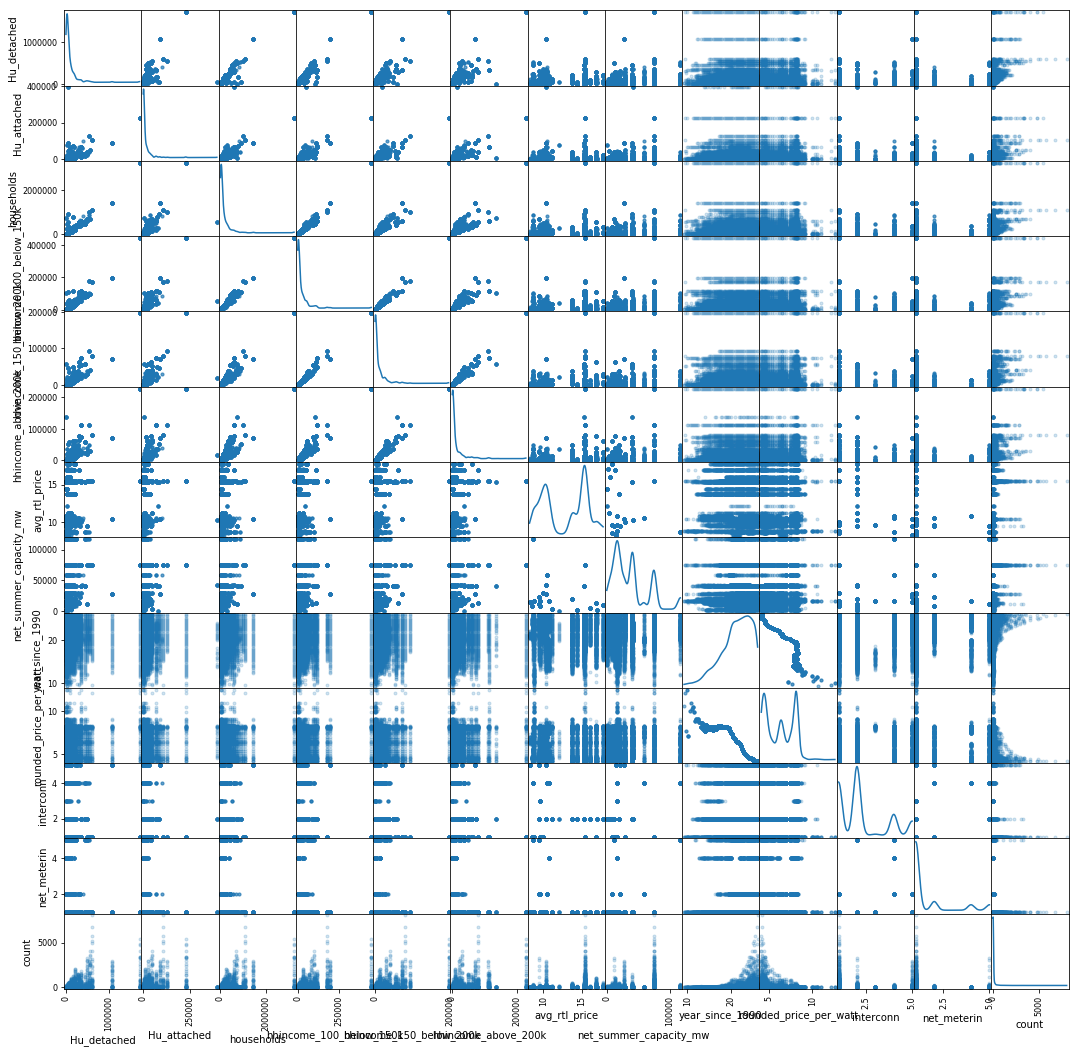

In [6]:
scatter_matrix(installation, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [7]:
installation_features = installation.ix[:,0:12]
installation_labels = installation.ix[:,12:]

In [8]:
installation_features.head()

,Hu_detached,Hu_attached,households,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,net_summer_capacity_mw,year_since_1990,rounded_price_per_watt,interconn,net_meterin
0,31285,1032,36435,3571,984,802,10.31,42344,24.00,4.59,2,1
1,31285,1032,36435,3571,984,802,10.31,42344,22.25,6.02,2,1
2,31285,1032,36435,3571,984,802,10.31,42344,21.25,6.48,2,1
3,31285,1032,36435,3571,984,802,10.31,42344,20.00,7.52,2,1
4,204398,18020,299764,39869,14389,11691,15.28,40249,26.00,4.21,2,1


In [9]:
model = RandomizedLasso(alpha=0.1)
model.fit(installation_features, installation_labels["count"])
names = list(installation_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))

Features sorted by their score:
[(0.85999999999999999, 'Hu_detached'), (0.72999999999999998, 'year_since_1990'), (0.72999999999999998, 'rounded_price_per_watt'), (0.60499999999999998, 'avg_rtl_price'), (0.58999999999999997, 'net_summer_capacity_mw'), (0.48499999999999999, 'interconn'), (0.40000000000000002, 'hhincome_150_below_200k'), (0.39500000000000002, 'net_meterin'), (0.315, 'hhincome_100_below_150k'), (0.185, 'Hu_attached'), (0.13500000000000001, 'households'), (0.040000000000000001, 'hhincome_above_200k')]


In [10]:
"""for another label/outcome
model = RandomizedLasso(alpha=0.1)
model.fit(installation_features, installation_labels["total"])
names = list(installation_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))
"""

'for another label/outcome\nmodel = RandomizedLasso(alpha=0.1)\nmodel.fit(installation_features, installation_labels["total"])\nnames = list(installation_features)\n\nprint("Features sorted by their score:")\nprint(sorted(zip(map(lambda x: round(x, 4), model.scores_), \n                 names), reverse=True))\n'

## Let's focus on predicting installation

In [11]:
installation_labels = installation.ix[:,12]

In [12]:
installation_labels.head()

0     1
1     1
2     1
3     1
4    83
Name: count, dtype: int64

In [21]:
splits = ms.train_test_split(installation_features, installation_labels, test_size=0.2)
#splits = cv.train_test_split(installation_features, installation_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits
X_train, X_test, y_train, y_test = splits

# Linear Regression Models: 

In [22]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.coef_.tolist())))

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Ridge Regression model
Mean Squared Error: 41139.241
Coefficient of Determination: 0.288


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.coef_.tolist())))

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 41139.235
Coefficient of Determination: 0.288


In [24]:
#A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction.
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Perceptron model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Perceptron model
Mean Squared Error: 58924.240
Coefficient of Determination: -0.020


In [25]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Support Vector Machines SVM model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Support Vector Machines SVM model
Mean Squared Error: 59019.574
Coefficient of Determination: -0.022


# Non-Linear Regression Models:

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.feature_importances_.tolist())))

print("DecisionTreeRegressor")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

DecisionTreeRegressor
Mean squared error = 2978.817
R2 score = 0.948


In [27]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.feature_importances_.tolist())))

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model
Mean squared error = 2991.472
R2 score = 0.948


In [28]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("KNeighborsRegressor Model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

KNeighborsRegressor Model
Mean Squared Error: 2446.620
Coefficient of Determination: 0.958


## Which one did best? 

## What should we try next?

## Ready for a bigger challenge? Try this one!

Build a command line application to compute the energy efficiency of a house     
https://github.com/georgetown-analytics/machine-learning/blob/master/code/energy.py